<a href="https://colab.research.google.com/github/chaos44/food_recognition/blob/master/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
p1 = drive.CreateFile({'id':'1OfOAFuQyvs0jVc58lFSwcdXi9-0vSuTR'})
p2 = drive.CreateFile({'id':'1B9MMVZZR4Fcn89achMFyv1W2Xtv-U-WZ'})
p3 = drive.CreateFile({'id':'1WBLE_wG2Qy5BFh81K0rqwyrPaPivT4Km'})


p1.GetContentFile('udon.JPG')
p2.GetContentFile('curry.JPG')
p3.GetContentFile('curry_1.JPG')

In [26]:
# 中心から任意のサイズをトリミング
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [35]:
# パラメータの初期化
classes = ['beefdon', 'curry', 'fish', 'humberger', 'katsudon', 'ramen', 'seafooddon', 'soba', 'spaghetti', 'tempuradon'
         , 'udon', 'lasagna', 'hamburger_steak', 'nikujaga', 'fried_rice', 'omelette', 'sukiyaki', 'sushi', 'gyoza', 'fried_chicken'
         , 'okonomiyaki', 'croquette', 'pancake', 'french_toast', 'tart', 'taco_rice', 'doria', 'takoyaki', 'tapioca', 'yakisoba'
         , 'ginger_pork', 'steak', 'roast_meat', 'bread', 'yakitori', 'rice_ball', 'goya_chanpuru', 'instant_noodle', 'meat_bun', 'gratin'
         , 'mabo_tofu', 'tiramisu', 'cream_puff', 'eclair', 'hot_dog', 'potato_salad', 'stew', 'pizza', 'french_fry', 'avocado_salad']
num_classes = len(classes)
image_size = 150

In [36]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt

def process(data):
    plt.figure()
    plt.imshow(data)

In [37]:
from tensorflow.keras.models import Sequential, Model, load_model
model = load_model('food_recognition_mobile.h5')
print(model)

spaghetti 99



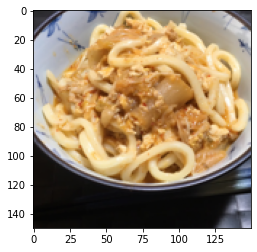

In [42]:
files = glob.glob('./udon.JPG')
for i, file in enumerate(files):
      image = Image.open(file)
      image = image.convert('RGB')
      # image = image.convert('RGB')の前にトリミングするとメモリオーバー、理由不明
      image = crop_center(image, 800, 800) # resizeする時にアスペクト比を固定させるため、800*800の部分をトリミング
      w, h = image.size
      image = crop_center(image, w, w) if w >= h else crop_center(image, h, h)
      image = image.resize((image_size, image_size))
      data = np.asarray(image, dtype=np.float32) / 255.0  # 正規化 # dtype=np.float32でサイズ縮小、MemoryError解消のため # 2020/7/7
      data = np.array(data)
      process(data)
      X = []
      # 最後尾に追加する
      X.append(data)
      X = np.array(X)
      result = model.predict([X])[0]
      # 値の大きい方の番号(配列の添字)を返す
      predicted = result.argmax()
      percentage = int(result[predicted] * 100)
      print(classes[predicted], percentage)
      print()